In [21]:
import numpy as np
import pandas as pd
import scipy.stats
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits

### Generating N samples from a normal distribution and plot the histogram.


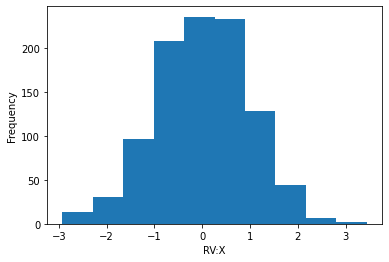

In [15]:
def sample_from_norm(N):
    dist = scipy.stats.norm(0,1)
    samples = dist.rvs(N)
    plt.hist(samples)
    plt.xlabel('RV:X')
    plt.ylabel('Frequency')
sample_from_norm(1000)

### K-Means from scratch

In [32]:
def kMeans(data,k,max_iter):
    # Chosing centroids
    idx = np.random.choice(len(data), k , replace = False)
    print(idx)
    cetroids = data[idx:]
    # Find the distance
    
    distances = cdist(data,centroids,metric='euclidean')
    
    print(distances)
    # Update new centroidz

In [95]:
def kMeans(X,k):
    
    diff = 1
    cluster = np.zeros(X.shape[0])
    
    idx = np.random.choice(len(X), k , replace=False)
    centroids = list()
    for i in idx:
        centroids.append(X[i])
    while diff:
        
        for i,row in enumerate(X):
            
            min_dist = float('inf')
            
            # distance of all points from cetnroids
            
            for idx, cent in enumerate(centroids):
                d = np.sqrt(((cent[0] - row[0]) **2) +  ((cent[1] - row[1]) **2))
                
                # update the closest
                if min_dist > d:
                    min_dist = d
                    
                    cluster[i] = idx
                    
            new_centroids = pd.DataFrame(X).groupby(by=cluster).mean()
            
            # if centroids are same dont replace
            
            if np.count_nonzero(centroids-new_centroids) == 0:
                
                diff = 0
            else:
                centroids = new_centroids
                
    return centroids, cluster
                            
                            
            
    

In [97]:
# kMeans(X,2)

### Logistic Regression

In [108]:
from sklearn.datasets import make_classification
import math
X, y = make_classification(n_features=2, 
                           n_redundant=0, 
                           n_informative=2, 
                           random_state=1, 
                           n_clusters_per_class=1)

In [140]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

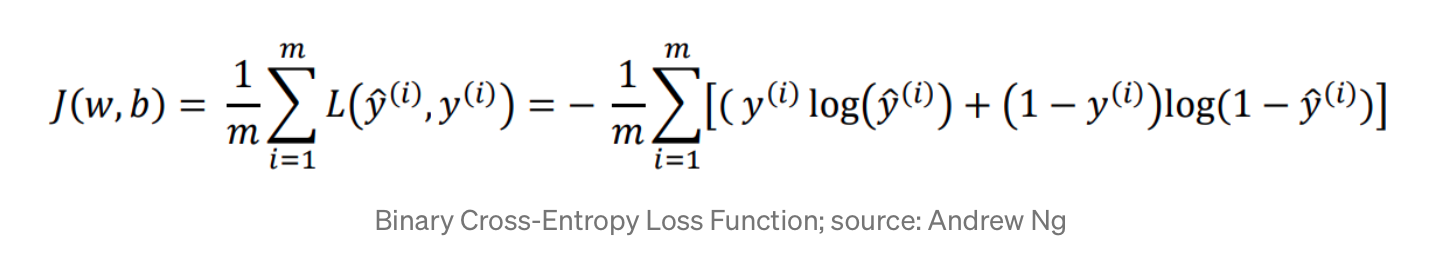

By looking at the Loss function, we can see that loss approaches 0 when we predict correctly, i.e, when y=0 and y_hat=0 or, y=1 and y_hat=1, and loss function approaches infinity if we predict incorrectly, i.e, when y=0 but y_hat=1 or, y=1 but y_hat=1.

#### Gradient Descent

In [141]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
    return X


def gradient(X,y,y_hat):
    m = X.shape[0]
    
    # wrt w
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    
    # wrt b
    db = (1/m) * np.sum(y_hat - y)
    
    return dw,db

In [155]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradient(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [156]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

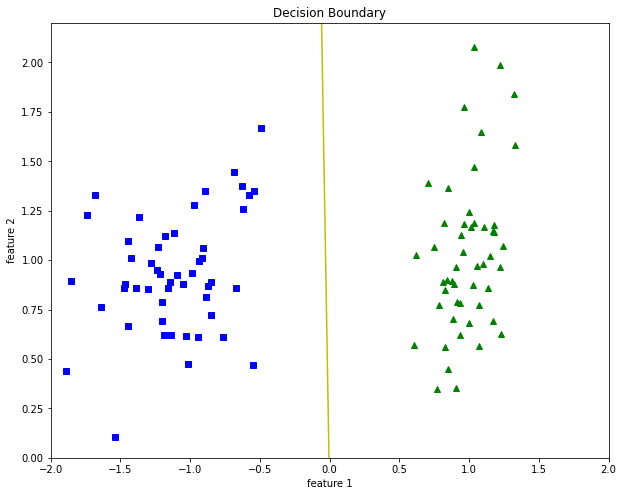

In [157]:
# Training 
w, b, l = train(X, y, bs=100, epochs=100, lr= 0.1)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)